In [3]:
# load graph representation of network
# station -> nodes
# stretches -> edges

import networkx as nx
import pandas as pd

STRETCHES_PATH = '../static/stretches.csv'
STATIONS_PATH = '../static/stations.csv'

stretches = pd.read_csv(STRETCHES_PATH, dtype=str).dropna(how='all')
stations = pd.read_csv(STATIONS_PATH, dtype=str).dropna(how='all')

G = nx.Graph()

# add nodes
station_list = list(stations.itertuples(index=False, name=None)) # [(station_name, station_uic)]
nodes = [(station[1], {'station_name': station[0]}) for station in station_list]
G.add_nodes_from(nodes)

# add edges
# attraction force is used to draw the graph by defining the attraction force between the two nodes and is the inverted travel time
edge_list = list(stretches[['station_uic_from', 'station_uic_to', 'station_name_from','station_name_to','travel_cost','super_name']].itertuples(index=False, name=None)) # [(station_name_from, station_uic_from, station_name_to, station_uic_from, travel_cost, super_name)]
edges = [(edge[0], edge[1], {'station_name_from': edge[2], 'station_name_to': edge[3], 'travel_cost': int(edge[4]), 'super_name': edge[5], 'attraction_force': (1 / int(edge[4])) if int(edge[4]) > 0 else 0}) for edge in edge_list]
G.add_edges_from(edges)


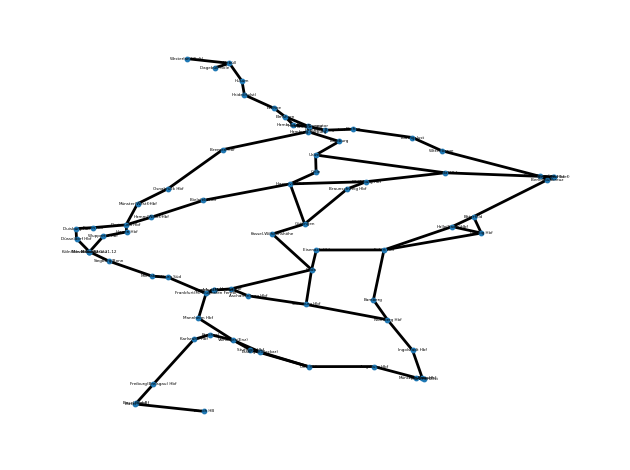

In [4]:

if True:
    import matplotlib.pyplot as plt

    nodes = list(G.nodes())
    
    
    eva_coordinates = {
    '8007769': (54.730275, 8.691840),  # Dagebüll Mole
    '8006369': (54.91000, 8.30750),  # Westerland (Sylt)
    '8004343': (54.81917, 8.89417),  # Niebüll
    '8000181': (54.46917, 9.06750),  # Husum
    '8000155': (54.19304, 9.10098),  # Heide (Holst)
    '8003102': (53.92055, 9.51557),  # Itzehoe
    '8000092': (53.75763, 9.66130),  # Elmshorn
    '8002553': (53.58647, 9.77767),  # Hamburg-Altona
    '8002548': (53.55833, 9.98611),  # Hamburg Dammtor
    '8002549': (53.55222, 9.99306),  # Hamburg Hbf
    '8000147': (53.45194, 9.98028),  # Hamburg-Harburg
    '8000238': (53.25250, 10.41083), # Lüneburg
    '8000168': (52.97444, 10.08444), # Uelzen
    '8000064': (52.61944, 10.09139), # Celle
    '8000152': (52.37583, 9.73278),  # Hannover Hbf
    '8000128': (51.53333, 9.93333),  # Göttingen
    '8003200': (51.31944, 9.48750),  # Kassel-Wilhelmshöhe
    '8000115': (50.55250, 10.02917), # Fulda
    '8000150': (50.13444, 8.91806),  # Hanau Hbf
    '8002041': (50.10639, 8.68611),  # Frankfurt (Main) Süd
    '8000105': (50.11083, 8.67861),  # Frankfurt (Main) Hbf
    '8070003': (50.03333, 8.57083),  # Frankfurt (M) Flughafen Fernbf
    '8000244': (49.48750, 8.46667),  # Mannheim Hbf
    '8006053': (48.99861, 8.94444),  # Vaihingen (Enz)
    '8000096': (48.78333, 9.18333),  # Stuttgart Hbf
    '8001920': (48.73750, 9.31139),  # Esslingen (Neckar)
    '8000170': (48.40139, 9.98722),  # Ulm Hbf
    '8000013': (48.40333, 10.89333), # Augsburg Hbf
    '8004158': (48.15083, 11.46917), # München-Pasing
    '8000262': (48.11417, 11.58639), # München Ost
    '8000261': (48.14167, 11.55833), # München Hbf
    '8000183': (48.76667, 11.42500), # Ingolstadt Hbf
    '8000284': (49.45333, 11.07750), # Nürnberg Hbf
    '8089478': (49.89167, 10.88333), # Bamberg
    '8010101': (50.97833, 11.02917), # Erfurt Hbf
    '8070814': (51.47639, 11.97083), # Halle (Saale) Hbf
    '8010050': (51.68833, 12.26667), # Bitterfeld
    '8011113': (52.46000, 13.28333), # Berlin Südkreuz
    '8098160': (52.52000, 13.36917), # Berlin Hbf (tief)
    '8011160': (52.52083, 13.37833), # Berlin Hbf
    '8010404': (52.53333, 13.18333), # Berlin-Spandau
    '8010334': (52.60722, 11.87083), # Stendal Hbf
    '8006552': (52.42250, 10.78611), # Wolfsburg Hbf
    '8000036': (52.03083, 8.53250),  # Bielefeld Hbf
    '8000149': (51.67417, 7.81083),  # Hamm (Westf) Hbf
    '8000080': (51.51444, 7.46667),  # Dortmund Hbf
    '8000098': (51.45500, 7.01167),  # Essen Hbf
    '8000086': (51.43417, 6.77417),  # Duisburg Hbf
    '8000085': (51.22167, 6.78167),  # Düsseldorf Hbf
    '8003368': (50.93833, 6.96083),  # Köln Messe/Deutz
    '8073368': (50.93833, 6.96083),  # Köln Messe/Deutz Gl.11-12
    '8000207': (50.94167, 6.95833),  # Köln Hbf
    '8005556': (50.73417, 7.23417),  # Siegburg/Bonn
    '8000667': (50.41333, 7.82333),  # Montabaur
    '8003680': (50.38333, 8.05000),  # Limburg Süd
    '8000050': (53.08333, 8.80000),  # Bremen Hbf
    '8000294': (52.27917, 8.04917),  # Osnabrück Hbf
    '8000263': (51.96083, 7.62500),  # Münster (Westf) Hbf
    '8000142': (51.36417, 7.47417),  # Hagen Hbf
    '8000266': (51.26722, 7.15000),  # Wuppertal Hbf
    '8002554': (53.48222, 10.21750), # Hamburg-Bergedorf
    '8000058': (53.50139, 10.60722), # Büchen
    '8010216': (53.33250, 11.42000), # Ludwigslust
    '8010382': (53.06333, 11.82500), # Wittenberge
    '8000010': (49.98139, 9.15167),  # Aschaffenburg Hbf
    '8000260': (49.79167, 9.95333),  # Würzburg Hbf
    '8000191': (49.01417, 8.40417),  # Karlsruhe Hbf
    '8000055': (49.12250, 8.62833),  # Bruchsal
    '8010097': (50.97667, 10.09500), # Eisenach Hbf
    '8000049': (52.27250, 10.52250), # Braunschweig Hbf
    '8010205': (51.34000, 12.37333), # Leipzig Hbf
    "8000107": (47.997697, 7.84117),     # Freiburg (Breisgau) Hbf :contentReference[oaicite:0]{index=0}
    "8000026": (47.566944, 7.6075),      # Basel Bad Bf :contentReference[oaicite:1]{index=1}
    "8500010": (47.547412, 7.589563),    # Basel SBB :contentReference[oaicite:2]{index=2}
    "8503000": (47.377778, 8.540278),    # Zürich HB :contentReference[oaicite:3]{index=3}
}


    import math
    from pyproj import Transformer

    # Transformer: WGS84 (lat/lon) -> Web Mercator (x,y in Metern)
    transformer = Transformer.from_crs("EPSG:4326", "EPSG:3857", always_xy=True)

    pos = {}
    for eva, (lat, lon) in eva_coordinates.items():
        x, y = transformer.transform(lon, lat)
        pos[eva] = (x, y)

    #pos = nx.kamada_kawai_layout(G, weight='travel_cost')
    #pos = nx.kamada_kawai_layout(G, weight='travel_cost', pos=initial_pos)
    # nodes
    
    
    nx.draw_networkx_nodes(G, pos, node_size=10)

    # edges
    nx.draw_networkx_edges(G, pos, edgelist=G.edges, width=2)

    # node labels
    labels = {n: d["station_name"] for n, d in G.nodes(data=True)}
    nx.draw_networkx_labels(G, pos, font_size=3, font_family="sans-serif", labels=labels)
    # edge weight labels
    #edge_labels = nx.get_edge_attributes(G, "travel_cost")
    #nx.draw_networkx_edge_labels(G, pos,font_size=5, edge_labels=edge_labels)

    ax = plt.gca()
    ax.margins(0.08)
    plt.axis("off")
    plt.tight_layout()
    
    plt.savefig("graph.png", format="png", dpi=900, bbox_inches='tight')
    
    plt.show()
